In [27]:
import tensorflow as tf

In [28]:
import pandas as pd
import numpy as np

In [29]:
df_bon=pd.read_csv('Donnees_Vols_BON_F_2.csv')
df_mauvais=pd.read_csv('Donnees_Vols_RA_2.csv')


In [30]:
df_merge = pd.concat([df_bon, df_mauvais], ignore_index=True)

In [31]:
df_merge.shape
df_merge.describe()


,mission_id,time,real_x,real_y,real_z,vx,vy,vz,ax,ay,...,yaw,wind_x,wind_y,wind_z,erreur_m,velocity,rain,fog,snow,is_attack
count,11970.000000,1.197000e+04,11970.000000,11970.000000,11970.000000,11970.000000,11970.000000,11970.000000,11970.000000,11970.000000,...,11970.000000,11970.000000,11970.000000,11970.000000,8484.000000,11970.000000,11970.000000,11970.000000,8484.000000,11970.000000
mean,359.884211,1.238530e+09,7.673118,2.827080,-0.820241,0.257281,0.232415,0.162642,-0.025511,-2.899432,...,0.834563,2.709272,1.561976,21.180512,3.979329,215.836215,0.096630,0.095493,0.102379,0.550877
std,249.289917,7.939404e+08,57.858971,16.549333,4.652921,3.293477,1.065467,0.656467,0.402225,4.523839,...,2.502101,0.535967,0.723544,84.103713,6.651783,1013.418393,0.056159,0.059111,0.060145,0.497426
min,1.000000,-5.240803e+00,-809.051331,-14.126108,-23.077223,-50.758011,-4.784234,-4.942766,-7.257311,-17.565296,...,-3.141575,1.500410,0.400075,0.017362,0.006554,0.089348,0.000000,0.000000,0.000000,0.000000
25%,172.000000,3.600000e+01,0.687416,-1.976651,-4.735531,-0.122411,-0.112822,-0.044011,-0.068146,-9.737792,...,-1.955032,2.359034,0.573977,0.464095,0.118583,5.040000,0.050000,0.044000,0.050000,0.000000
50%,299.500000,1.747483e+09,9.961308,0.519739,-0.981674,0.383569,0.052402,0.014454,-0.024658,-0.049634,...,2.511268,2.802239,1.791837,0.532415,0.453177,7.290000,0.090500,0.096000,0.098000,1.000000
75%,469.000000,1.747514e+09,19.967551,3.921616,0.856533,0.615758,0.682728,0.619994,0.018621,0.006693,...,2.993793,3.143449,2.141868,0.733471,5.392579,9.800000,0.140000,0.145000,0.157500,1.000000
max,966.000000,1.747660e+09,538.396240,253.241379,48.074783,29.395905,16.430178,15.107558,5.140120,9.114528,...,3.499692,3.499986,2.499889,935.804447,49.847041,18753.752602,0.200000,0.199000,0.199000,1.000000


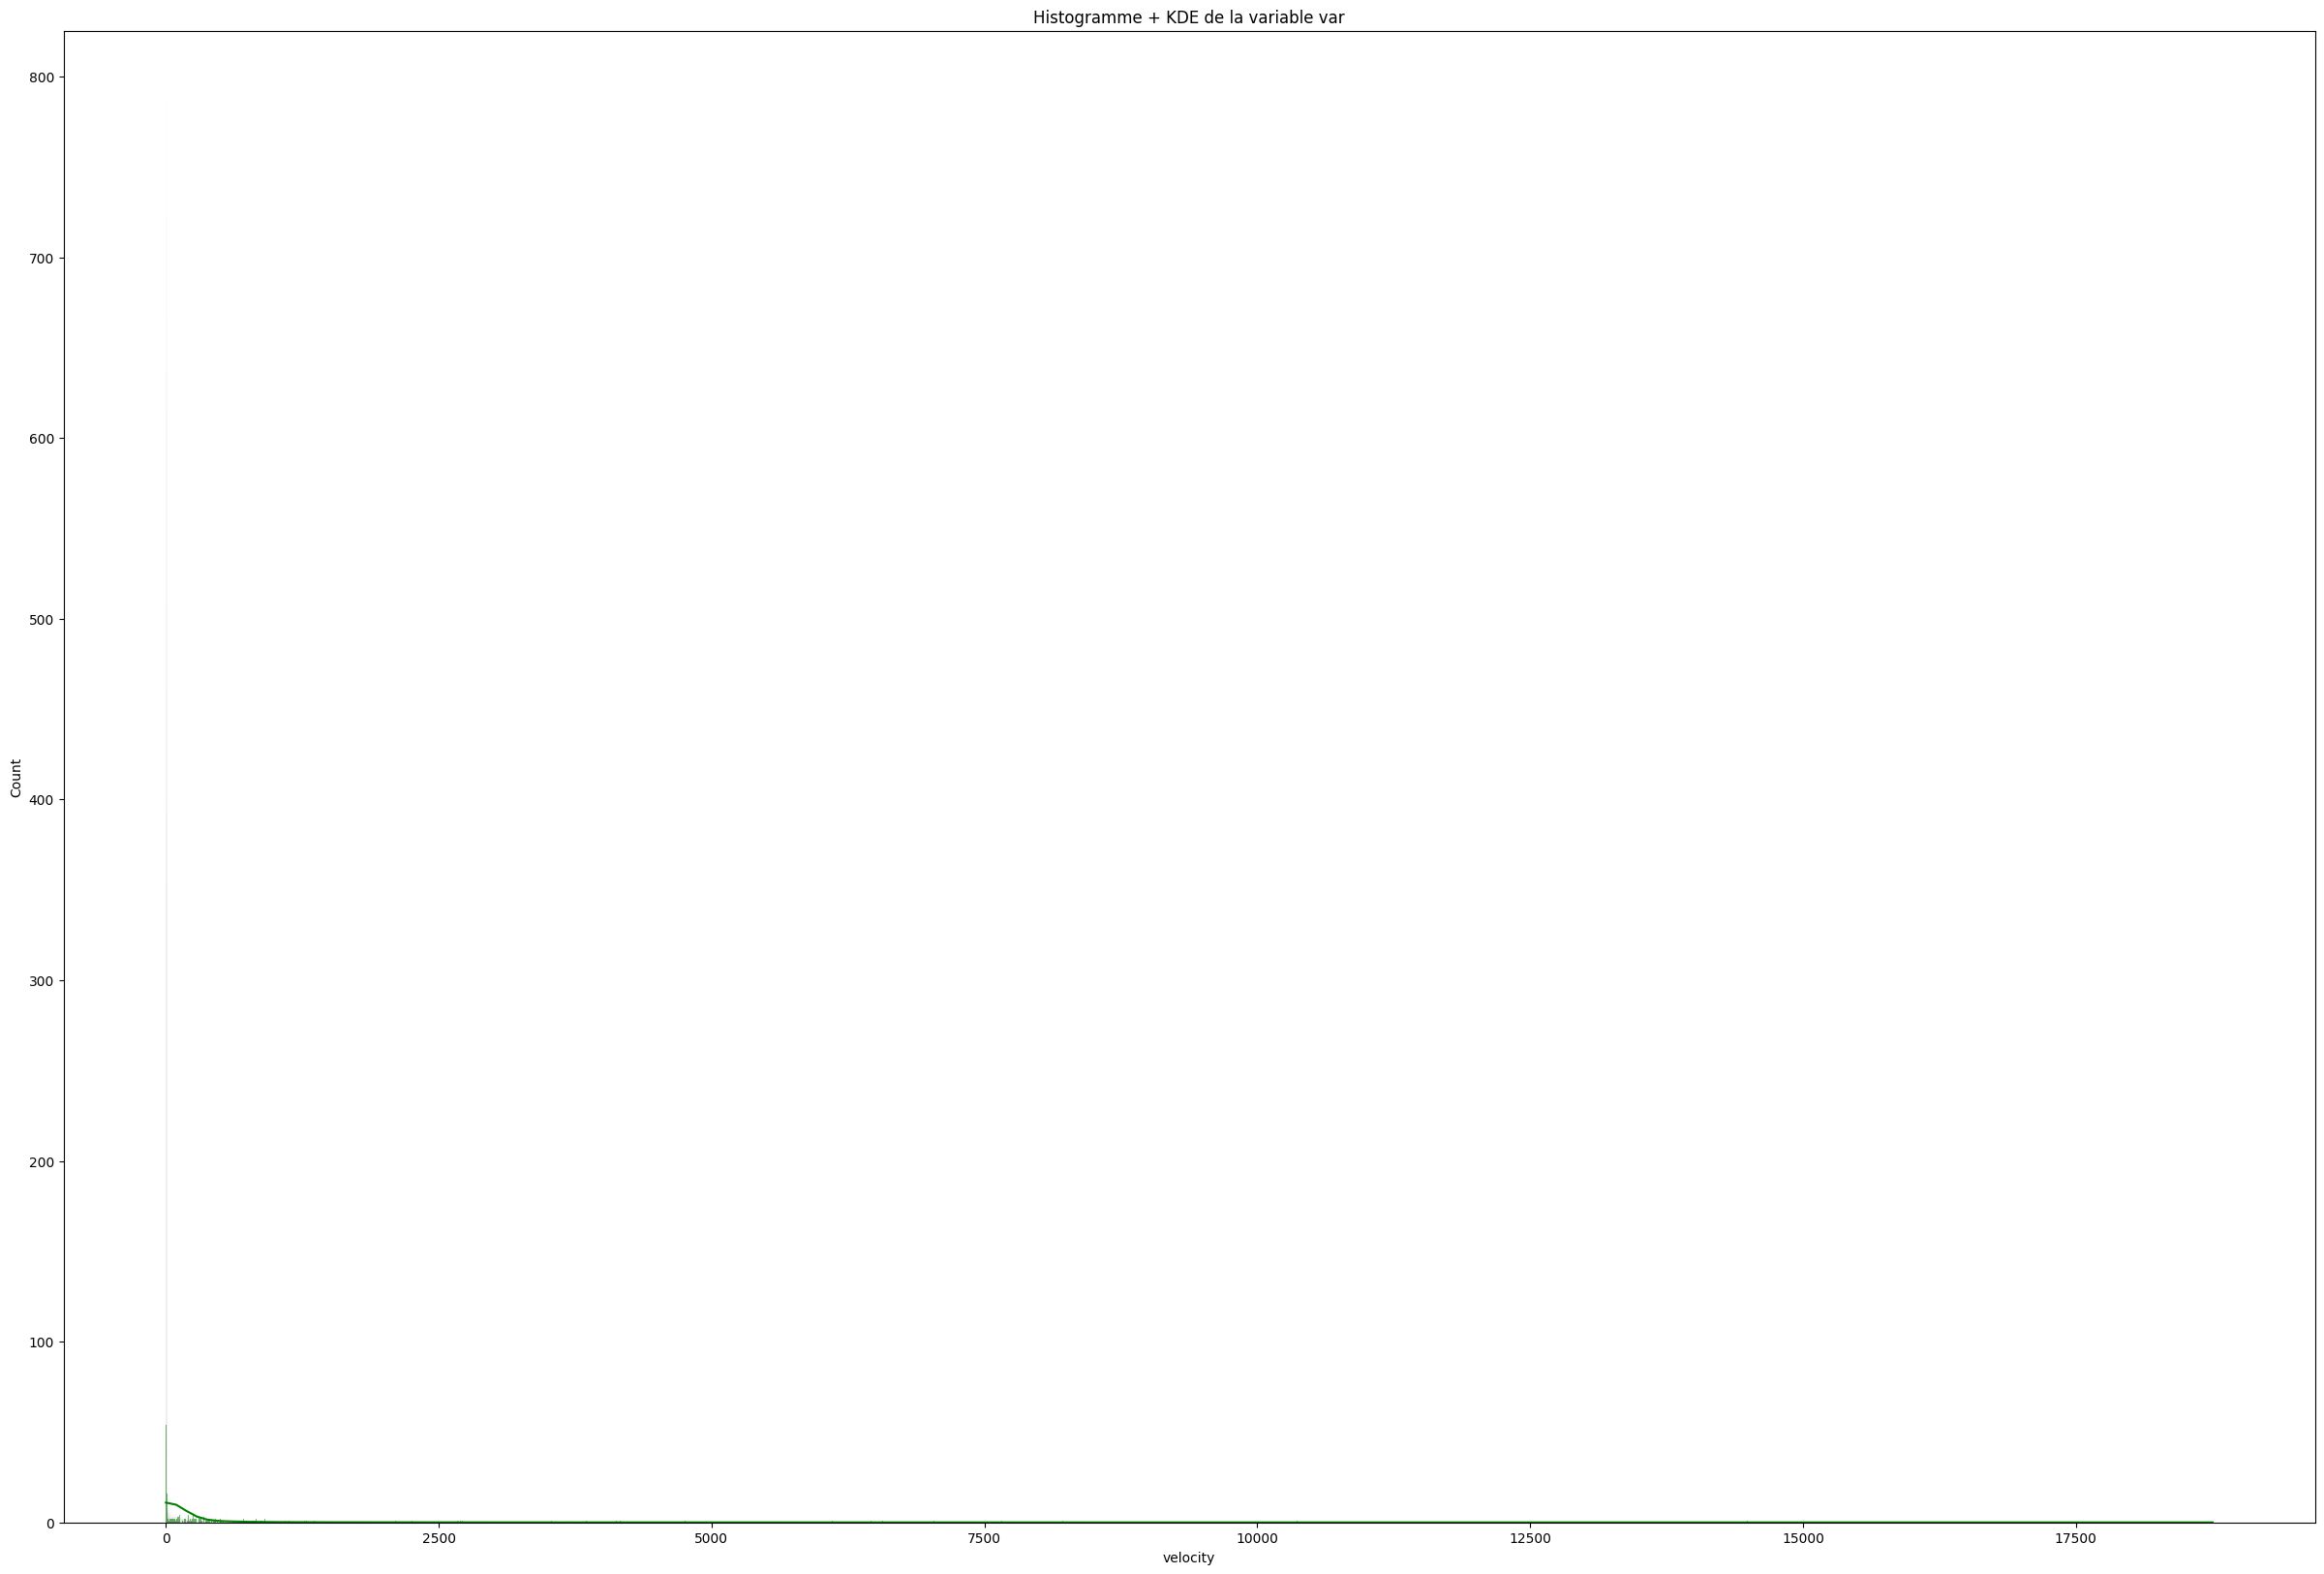

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,20))
sns.histplot(df_merge['velocity'], kde=True, color='green')
plt.title('Histogramme + KDE de la variable var')
plt.show()

In [33]:
seuil = 200
mediane = df_merge['velocity'].median()

df_merge.loc[df_merge['velocity'] > seuil, 'velocity'] = mediane

In [34]:
pourcentage = df_merge['is_attack'].value_counts(normalize=True) * 100
print(pourcentage)

is_attack
1.0    55.087719
0.0    44.912281
Name: proportion, dtype: float64


In [35]:
df_merge.shape

(11970, 23)

In [36]:
X=df_merge.drop(columns=['is_attack','snow','erreur_m'],axis=1)
Y=df_merge['is_attack']

In [37]:
nan_percent = df_merge.isna().mean() * 100
print(nan_percent)

mission_id     0.000000
time           0.000000
real_x         0.000000
real_y         0.000000
real_z         0.000000
vx             0.000000
vy             0.000000
vz             0.000000
ax             0.000000
ay             0.000000
az             0.000000
roll           0.000000
pitch          0.000000
yaw            0.000000
wind_x         0.000000
wind_y         0.000000
wind_z         0.000000
erreur_m      29.122807
velocity       0.000000
rain           0.000000
fog            0.000000
snow          29.122807
is_attack      0.000000
dtype: float64


In [38]:
from sklearn.feature_selection import f_classif
import pandas as pd

 # binaire ou catégorielle

 #F, p = f_classif(X, Y)

#for i, col in enumerate(X.columns):
    #print(f"{col} → F-score : {F[i]:.2f}, p-value : {p[i]:.4f}")

In [39]:
from scipy.stats import pointbiserialr

for col in X.columns:
    corr, pval = pointbiserialr(X[col], Y)
    print(f"{col} → Corrélation point biserial : {corr:.4f}, p-value : {pval:.4f}")

mission_id → Corrélation point biserial : 0.4844, p-value : 0.0000
time → Corrélation point biserial : 0.7100, p-value : 0.0000
real_x → Corrélation point biserial : 0.1209, p-value : 0.0000
real_y → Corrélation point biserial : -0.1592, p-value : 0.0000
real_z → Corrélation point biserial : -0.1538, p-value : 0.0000
vx → Corrélation point biserial : 0.0145, p-value : 0.1137
vy → Corrélation point biserial : -0.2309, p-value : 0.0000
vz → Corrélation point biserial : 0.2180, p-value : 0.0000
ax → Corrélation point biserial : -0.0142, p-value : 0.1198
ay → Corrélation point biserial : 0.7069, p-value : 0.0000
az → Corrélation point biserial : -0.7009, p-value : 0.0000
roll → Corrélation point biserial : -0.1046, p-value : 0.0000
pitch → Corrélation point biserial : 0.0275, p-value : 0.0027
yaw → Corrélation point biserial : -0.3857, p-value : 0.0000
wind_x → Corrélation point biserial : 0.5971, p-value : 0.0000
wind_y → Corrélation point biserial : 0.6703, p-value : 0.0000
wind_z → Corr

In [40]:
X=X.drop(columns=['vx','roll'])

In [41]:
from tensorflow.keras.layers import Layer, ReLU

class ScaledReLU(Layer):
    def __init__(self, name_prefix, **kwargs):
        super(ScaledReLU, self).__init__(**kwargs)
        self.name_prefix = name_prefix
        self.relu = ReLU()

    def build(self, input_shape):
        self.a = self.add_weight(name=f"{self.name_prefix}_a",
                                 shape=(),
                                 initializer="ones",
                                 trainable=True)

    def call(self, inputs):
        return self.a * self.relu(inputs)

IMPLEMENTATION D'UN RESEAUX DE NEURONES RECURRENTS

In [42]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, Lambda
from tensorflow.keras.models import Model

# Hypothèses
timesteps = 21         # 21 étapes temporelles
features_per_step = 18 # Nombre de features à chaque step (ex: accéléro, gyro...)


features_input = Input(shape=(timesteps, features_per_step), name='X')

# Initialisation de l'activation h0 = 0 (batch_size, 1)
activation = Lambda(lambda x: tf.zeros_like(x[:, :1,0]))(features_input)
a = tf.Variable(initial_value=1.0, trainable=True, dtype=tf.float32, name="learnable_scalar")
print(activation.shape)
activations=[]
# Boucle manuelle sur les 21 steps
for t in range(timesteps):
    step_features = Lambda(lambda x: x[:, t])(features_input) # (None, 1)
    combined_input = Concatenate(axis=1)([step_features, activation])  # (batch_size, 18+1)
    
    # Passer par une couche dense = "neurone" personnalisé
    neuron_output = Dense(1, activation='sigmoid', name=f'neuron_{t+1}')(combined_input)
    scaled_relu = ScaledReLU(name_prefix=f't{t+1}')(neuron_output)
    activation = scaled_relu
    activations.append(scaled_relu)
    

final_output = Dense(1, activation='sigmoid')(activation)

# Construction du modèle
model = Model(inputs=features_input, outputs=final_output)

# Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # regression : MSE/MAE

# Résumé du modèle
model.summary()


(None, 1)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ X (InputLayer)      │ (None, 21, 18)    │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_23 (Lambda)  │ (None, 18)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_22 (Lambda)  │ (None, 1)         │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_21      │ (None, 19)        │          0 │ lambda_23[0][0],  │
│ (Concatenate)       │                   │            │ lambda_22[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ neuron_1 (Dense)    │ (None, 1)         │         20 │ concatenate_21[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_24 (Lambda)  │ (None, 18)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ scaled_re_lu_21     │ (None, 1)         │          1 │ neuron_1[0][0]    │
│ (ScaledReLU)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_22      │ (None, 19)        │          0 │ lambda_24[0][0],  │
│ (Concatenate)       │                   │            │ scaled_re_lu_21[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ neuron_2 (Dense)    │ (None, 1)         │         20 │ concatenate_22[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_25 (Lambda)  │ (None, 18)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ scaled_re_lu_22     │ (None, 1)         │          1 │ neuron_2[0][0]    │
│ (ScaledReLU)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_23      │ (None, 19)        │          0 │ lambda_25[0][0],  │
│ (Concatenate)       │                   │            │ scaled_re_lu_22[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ neuron_3 (Dense)    │ (None, 1)         │         20 │ concatenate_23[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_26 (Lambda)  │ (None, 18)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ scaled_re_lu_23     │ (None, 1)         │          1 │ neuron_3[0][0]    │
│ (ScaledReLU)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_24      │ (None, 19)        │          0 │ lambda_26[0][0],  │
│ (Concatenate)       │                   │            │ scaled_re_lu_23[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ neuron_4 (Dense)    │ (None, 1)         │         20 │ concatenate_24[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_27 (Lambda)  │ (None, 18)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ scaled_re_lu_24     │ (None, 1)         │          1 │ neuron_4[0][0]    │
│ (ScaledReLU)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_25      │ (None, 19)        │          0 │ lambda_27[0][0],  │
│ (Concatenate)       │                   │            │ scaled_re_lu_24[… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 443 (1.73 KB)

 Trainable params: 443 (1.73 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [44]:
X.shape

(11970, 18)

In [45]:

X = X_scaled.to_numpy()[:570 * 21].reshape(570, 21, 18)
print(X)

[[[-1.43166288e+00  6.40743555e-01 -1.25967675e-01 ... -1.64333751e-01
   -4.74207081e-01 -1.44637300e+00]
  [-1.43166288e+00  6.40743559e-01 -9.00585721e-02 ... -1.64333751e-01
   -4.74207081e-01 -1.44637300e+00]
  [-1.43166288e+00  6.40743562e-01 -6.40155645e-02 ... -1.64333751e-01
   -4.74207081e-01 -1.44637300e+00]
  ...
  [-1.43166288e+00  6.40743605e-01  4.88767391e-01 ... -1.64333751e-01
   -4.74207081e-01 -1.44637300e+00]
  [-1.43166288e+00  6.40743608e-01  5.23617313e-01 ... -1.64333751e-01
   -4.74207081e-01 -1.44637300e+00]
  [-1.43166288e+00  6.40743610e-01  5.58243785e-01 ... -1.64333751e-01
   -4.74207081e-01 -1.44637300e+00]]

 [[-1.39957039e+00  6.40743862e-01 -1.34580122e-01 ... -3.43311672e-01
    9.50382345e-01 -1.26027465e+00]
  [-1.39957039e+00  6.40743864e-01 -9.46885237e-02 ... -3.43311672e-01
    9.50382345e-01 -1.26027465e+00]
  [-1.39957039e+00  6.40743867e-01 -6.27981562e-02 ... -3.43311672e-01
    9.50382345e-01 -1.26027465e+00]
  ...
  [-1.39957039e+00  6.4

In [46]:
nb_lignes = len(Y)
vol_length = 21
nb_vols = nb_lignes // vol_length
y = Y.to_numpy().reshape(nb_vols, 21)
y_vol = y[:, 0:1]
print(y_vol.shape)


(570, 1)


In [47]:
y = y_vol.reshape(-1, 1)
print(X.shape)


(570, 21, 18)


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
import numpy as np
import time

# Données fictives
        # Sortie attendue (ex : prédiction)

# Entraînement rapide
sart_time = time.time()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
end_time = time.time()


loss, accuracy = model.evaluate(X_test, y_test)
print("Training time : ",end_time - sart_time)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.4588 - loss: 0.8105 - val_accuracy: 0.4565 - val_loss: 0.7782
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4877 - loss: 0.7614 - val_accuracy: 0.4565 - val_loss: 0.7599
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4186 - loss: 0.8038 - val_accuracy: 0.4565 - val_loss: 0.7430
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4529 - loss: 0.7516 - val_accuracy: 0.4565 - val_loss: 0.7277
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4600 - loss: 0.7329 - val_accuracy: 0.4565 - val_loss: 0.7133
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4497 - loss: 0.7161 - val_accuracy: 0.4565 - val_loss: 0.7002
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4410 - loss: 0.7154 - val_accuracy: 0.4565 - val_loss: 0.6878
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4213 - loss: 0.7245 - val_accuracy: 0

In [50]:
import pickle
with open("mon_modele.pkl", "wb") as f:
    pickle.dump(model, f)

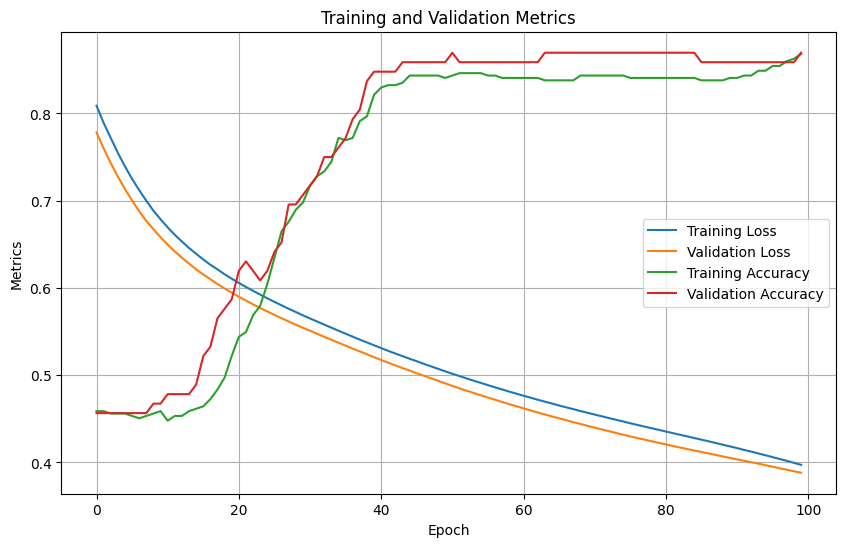

In [51]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
y_pred_proba = model.predict(X_test)
y_pred_classes = (y_pred_proba > 0.5).astype(int)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step


In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

         0.0       0.94      0.64      0.76        47
         1.0       0.79      0.97      0.87        67

    accuracy                           0.83       114
   macro avg       0.87      0.80      0.82       114
weighted avg       0.85      0.83      0.83       114



                                                     LSTM

In [54]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, BatchNormalization
from tensorflow.keras.models import Sequential
model2 = Sequential([
    LSTM(units=14, input_shape=(21, 18), return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(units=7, return_sequences=False),
    Dropout(0.3),
    BatchNormalization(),
    Dense(units=1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

sart_time = time.time()
history = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

end_time = time.time()


loss, accuracy = model2.evaluate(X_test, y_test)
print("Training time : ",end_time - sart_time)

c:\Users\NITRO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.6663 - loss: 0.6328 - val_accuracy: 0.7500 - val_loss: 0.6216
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7609 - loss: 0.5370 - val_accuracy: 0.8152 - val_loss: 0.5844
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7839 - loss: 0.4790 - val_accuracy: 0.8261 - val_loss: 0.5513
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8213 - loss: 0.4258 - val_accuracy: 0.8478 - val_loss: 0.5236
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7987 - loss: 0.4097 - val_accuracy: 0.8478 - val_loss: 0.4960
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8306 - loss: 0.3832 - val_accuracy: 0.8478 - val_loss: 0.4690
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8938 - loss: 0.3594 - val_accuracy: 0.8478 - val_loss: 0.4437
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8389 - loss: 0.3652 - val_accuracy: 0.

In [55]:
with open("mon_modele_lstm.pkl", "wb") as f:
    pickle.dump(model2, f)

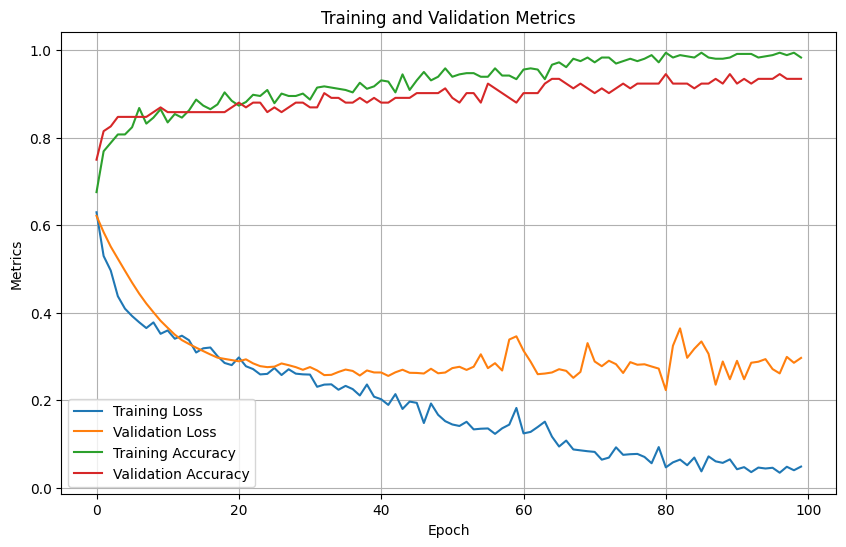

In [56]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
y_pred_proba = model2.predict(X_test)
y_pred_classes = (y_pred_proba > 0.5).astype(int)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step


In [58]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred_classes))


              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90        47
         1.0       0.90      0.97      0.94        67

    accuracy                           0.92       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


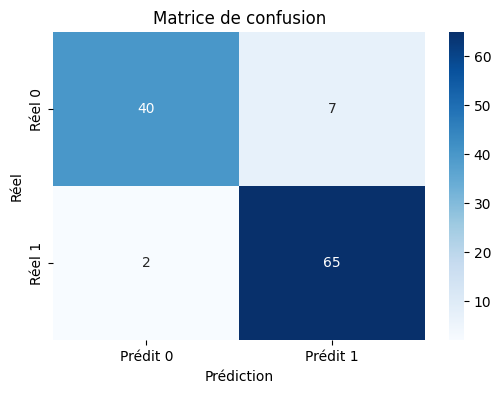

              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90        47
         1.0       0.90      0.97      0.94        67

    accuracy                           0.92       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



In [59]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Prédire les probabilités
y_pred_proba = model2.predict(X_test)

# 2. Convertir en classes (seuil = 0.5)
y_pred = (y_pred_proba > 0.5).astype(int)

# 3. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# 4. Affichage
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Prédit 0", "Prédit 1"], yticklabels=["Réel 0", "Réel 1"])
plt.title("Matrice de confusion")
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.show()

# 5. Rapport de classification
print(classification_report(y_test, y_pred))


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, Lambda
from tensorflow.keras.models import Model

# Hypothèses
timesteps = 21         # 21 étapes temporelles
features_per_step = 18 # Nombre de features à chaque step (ex: accéléro, gyro...)

features_input = Input(shape=(timesteps, features_per_step), name='X')

# Initialisation de l'activation h0 = 0 (batch_size, 1)
activation = Lambda(lambda x: tf.zeros_like(x[:, :1,0]))(features_input)
a = tf.Variable(initial_value=1.0, trainable=True, dtype=tf.float32, name="learnable_scalar")
print(activation.shape)
# Boucle manuelle sur les 21 steps
for t in range(timesteps):
    # Extraire les features du pas t : x_t.shape = (batch_size, 18)
    step_features = Lambda(lambda x: x[:, t])(features_input) # (None, 1)
    scaled_activation = Lambda(lambda x: a * x, name="scaled_activation")(activation)
    combined_input = Concatenate(axis=1)([step_features, activation])  # (batch_size, 18+1)
    
    # Passer par une couche dense = "neurone" personnalisé
    neuron_output = Dense(1, activation='sigmoid', name=f'neuron_{t+1}')(combined_input)
    activation=neuron_output
    #activation = Lambda(lambda x: tf.expand_dims(x, axis=1))(neuron_output) 
   
    
    

final_output = Dense(1, activation='sigmoid')(activation)

# Construction du modèle
model = Model(inputs=features_input, outputs=final_output)

# Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # regression : MSE/MAE

# Résumé du modèle
model.summary()


(None, 1)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ X (InputLayer)      │ (None, 21, 18)    │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_45 (Lambda)  │ (None, 18)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_44 (Lambda)  │ (None, 1)         │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_42      │ (None, 19)        │          0 │ lambda_45[0][0],  │
│ (Concatenate)       │                   │            │ lambda_44[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_46 (Lambda)  │ (None, 18)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ neuron_1 (Dense)    │ (None, 1)         │         20 │ concatenate_42[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_43      │ (None, 19)        │          0 │ lambda_46[0][0],  │
│ (Concatenate)       │                   │            │ neuron_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_47 (Lambda)  │ (None, 18)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ neuron_2 (Dense)    │ (None, 1)         │         20 │ concatenate_43[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_44      │ (None, 19)        │          0 │ lambda_47[0][0],  │
│ (Concatenate)       │                   │            │ neuron_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_48 (Lambda)  │ (None, 18)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ neuron_3 (Dense)    │ (None, 1)         │         20 │ concatenate_44[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_45      │ (None, 19)        │          0 │ lambda_48[0][0],  │
│ (Concatenate)       │                   │            │ neuron_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_49 (Lambda)  │ (None, 18)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ neuron_4 (Dense)    │ (None, 1)         │         20 │ concatenate_45[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_46      │ (None, 19)        │          0 │ lambda_49[0][0],  │
│ (Concatenate)       │                   │            │ neuron_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_50 (Lambda)  │ (None, 18)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ neuron_5 (Dense)    │ (None, 1)         │         20 │ concatenate_46[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_47      │ (None, 19)        │          0 │ lambda_50[0][0],  │
│ (Concatenate)       │                   │            │ neuron_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_51 (Lambda)  │ (None, 18)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ neuron_6 (Dense)    │ (None, 1)         │         20 │ concatenate_47[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_48      │ (None, 19)        │          0 │ lambda_51[0][0],

 Total params: 422 (1.65 KB)

 Trainable params: 422 (1.65 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
from tensorflow.keras.layers import Layer, ReLU

class ScaledReLU(Layer):
    def __init__(self, name_prefix, **kwargs):
        super(ScaledReLU, self).__init__(**kwargs)
        self.name_prefix = name_prefix
        self.relu = ReLU()

    def build(self, input_shape):
        self.a = self.add_weight(name=f"{self.name_prefix}_a",
                                 shape=(),
                                 initializer="ones",
                                 trainable=True)

    def call(self, inputs):
        return self.a * self.relu(inputs)

In [62]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, Lambda
from tensorflow.keras.models import Model

# Hypothèses
timesteps = 21         # 21 étapes temporelles
features_per_step = 18 # Nombre de features à chaque step (ex: accéléro, gyro...)

# Entrée globale : séquence temporelle entière
# Shape = (21, 18)
features_input = Input(shape=(timesteps, features_per_step), name='X')

# Initialisation de l'activation h0 = 0 (batch_size, 1)
activation = Lambda(lambda x: tf.zeros_like(x[:, :1,0]))(features_input)
a = tf.Variable(initial_value=1.0, trainable=True, dtype=tf.float32, name="learnable_scalar")
print(activation.shape)
activations=[]
# Boucle manuelle sur les 21 steps
for t in range(timesteps):
    # Extraire les features du pas t : x_t.shape = (batch_size, 18)
    step_features = Lambda(lambda x: x[:, t])(features_input) # (None, 1)
    combined_input = Concatenate(axis=1)([step_features, activation])  # (batch_size, 18+1)
    
    # Passer par une couche dense = "neurone" personnalisé
    neuron_output = Dense(1, activation='sigmoid', name=f'neuron_{t+1}')(combined_input)
    scaled_relu = ScaledReLU(name_prefix=f't{t+1}')(neuron_output)
    activation = scaled_relu
    activations.append(scaled_relu)

    #activation = Lambda(lambda x: tf.expand_dims(x, axis=1))(neuron_output) 
   
    
    

final_output = Dense(1, activation='sigmoid')(activation)

# Construction du modèle
model = Model(inputs=features_input, outputs=final_output)

# Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # regression : MSE/MAE

# Résumé du modèle
model.summary()



(None, 1)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ X (InputLayer)      │ (None, 21, 18)    │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_67 (Lambda)  │ (None, 18)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_66 (Lambda)  │ (None, 1)         │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_63      │ (None, 19)        │          0 │ lambda_67[0][0],  │
│ (Concatenate)       │                   │            │ lambda_66[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ neuron_1 (Dense)    │ (None, 1)         │         20 │ concatenate_63[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_68 (Lambda)  │ (None, 18)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ scaled_re_lu_42     │ (None, 1)         │          1 │ neuron_1[0][0]    │
│ (ScaledReLU)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_64      │ (None, 19)        │          0 │ lambda_68[0][0],  │
│ (Concatenate)       │                   │            │ scaled_re_lu_42[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ neuron_2 (Dense)    │ (None, 1)         │         20 │ concatenate_64[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_69 (Lambda)  │ (None, 18)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ scaled_re_lu_43     │ (None, 1)         │          1 │ neuron_2[0][0]    │
│ (ScaledReLU)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_65      │ (None, 19)        │          0 │ lambda_69[0][0],  │
│ (Concatenate)       │                   │            │ scaled_re_lu_43[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ neuron_3 (Dense)    │ (None, 1)         │         20 │ concatenate_65[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_70 (Lambda)  │ (None, 18)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ scaled_re_lu_44     │ (None, 1)         │          1 │ neuron_3[0][0]    │
│ (ScaledReLU)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_66      │ (None, 19)        │          0 │ lambda_70[0][0],  │
│ (Concatenate)       │                   │            │ scaled_re_lu_44[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ neuron_4 (Dense)    │ (None, 1)         │         20 │ concatenate_66[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_71 (Lambda)  │ (None, 18)        │          0 │ X[0][0]           │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ scaled_re_lu_45     │ (None, 1)         │          1 │ neuron_4[0][0]    │
│ (ScaledReLU)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_67      │ (None, 19)        │          0 │ lambda_71[0][0],  │
│ (Concatenate)       │                   │            │ scaled_re_lu_45[… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 443 (1.73 KB)

 Trainable params: 443 (1.73 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

sart_time = time.time()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

end_time = time.time()


loss, accuracy = model.evaluate(X_test, y_test)
print("Training time : ",end_time - sart_time)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.4543 - loss: 0.8199 - val_accuracy: 0.4565 - val_loss: 0.8160
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4772 - loss: 0.7964 - val_accuracy: 0.4565 - val_loss: 0.8027
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4485 - loss: 0.7931 - val_accuracy: 0.4565 - val_loss: 0.7900
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4367 - loss: 0.8050 - val_accuracy: 0.4565 - val_loss: 0.7779
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4202 - loss: 0.7962 - val_accuracy: 0.4565 - val_loss: 0.7665
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4287 - loss: 0.7715 - val_accuracy: 0.4674 - val_loss: 0.7562
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4673 - loss: 0.7531 - val_accuracy: 0.4674 - val_loss: 0.7467
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4392 - loss: 0.7586 - val_accuracy: 0